#                                          CS4055 Final Project

## Group Number: 19
## Group Member: Liangyue Yu (18111203)
## Group Member: Yusen Wang (18111327)
## Contribution: Each one is 50% of whole project. We did the two EDA, Data Preparation and three ML algorithms separately. Then we make it into one project together.
### Note: There are two persons in our group so we didn't do the F part as you said last time we met, could you please divide the 10% into other parts for our project? Thank you so much!

### Note: There are two `.csv` files in folder. We used the changed file because the original form has 7000 lines, we cut it into 3000 rows. We are so sorry to give you lots of trouble.

## B. Exploratory data analysis of the dataset. 

In [1]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from itertools import cycle

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

from scipy import interp
# used below to scale all predictor values to the range [0, 1]
# this is done separately for each fold in cross validation
min_max_scaler = preprocessing.MinMaxScaler()
#set random seed to ensure reproducible runs
RSEED = 50
%matplotlib inline
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

After importing the modules, the next step is to load the dataset into a Pandas dataframe.
Dataframe is the term used in Pandas for two-dimensional arrays.

In [2]:
df = pd.read_csv('./telco_customer_churn_19_09_2019.csv')

Once the dataset is loaded into a dataframe, we can have a look at the first and the last few data rows with the dataframe methods `head()` and `tail()`, respectively.

In [3]:
# Print first 5 rows of the dataframe.
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# Print last 5 rows of the dataframe.
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3325,0697-ZMSWS,Male,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.65,338.9,Yes
3326,7657-DYEPJ,Male,1,No,No,38,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,2497.35,Yes
3327,9494-BDNNC,Male,0,Yes,No,66,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,No,Electronic check,95.30,6273.4,No
3328,1640-PLFMP,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.25,70.25,No
3329,5366-OBVMR,Female,0,Yes,No,18,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.30,908.75,No
3330,8276-MQBYC,Male,1,No,No,51,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,97.80,4913.3,Yes
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3332,7593-XFKDI,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,46.30,46.3,Yes
3333,4573-JKNAE,Male,0,No,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.35,212.3,No
3334,0337-CNPZE,Female,0,No,No,41,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.30,4443.45,Yes


We can see that the dataset has 3335 data rows, and both numerical and categorical atrributes. The data rows are typically called *observations* or *examples*, and the columns are also called *attributes* or *features*.

In [5]:
# Print statistical summary for all numerical attributes
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,3335.000000,3335.000000,3335.000000
mean,0.157421,32.213793,64.910285
std,0.364252,24.571044,30.148921
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.325000
50%,0.000000,29.000000,70.600000
75%,0.000000,55.000000,89.950000
max,1.000000,72.000000,118.650000


In [6]:
# Check all of types for data.
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can find out that the `TotalCharges` is the "object". So it doesn't display on the `df.describe()`. We must change the type into "float64".

In [7]:
# Change the "object" into "float64".
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [8]:
# Check all of types for data.
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

We know that `TotalCharges` has already become "float64", then we can display it.

In [9]:
# Print statistical summary for all numerical attributes
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,3335.000000,3335.000000,3335.000000,3330.000000
mean,0.157421,32.213793,64.910285,2276.063589
std,0.364252,24.571044,30.148921,2272.226610
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,9.000000,35.325000,394.287500
50%,0.000000,29.000000,70.600000,1380.950000
75%,0.000000,55.000000,89.950000,3791.000000
max,1.000000,72.000000,118.650000,15069.500000


There are a few inferences we can draw by looking at the output of describe():

- `TotalCharges` has (3330 – 3335) 5 missing values.

We will fill in Missing Value for `TotalCharges` in next part.

Note that `SeniorCitizen` is rather a categorical attribute despite having numerical values. We can see that about 16% are senior citizen. How? `SeniorCitizen` has value 1 for those who are senior citizen, and 0 otherwise. The mean of `SeniorCitizen` is 0.157421, i.e. 15.7421% of the customers are senior citizen.

`dfname['column_name']` is a basic indexing technique to acess a particular column of the dataframe.

For example, for attribute `gender` the frequency table can be printed by the command:

In [10]:
df['gender'].value_counts()

Male      1706
Female    1629
Name: gender, dtype: int64

We can see that the number of "Male" and "Female" is roughly equal in the dataset.We can also check the total count of values in column `gender` with the command:

In [11]:
df['Contract'].value_counts()

Month-to-month    1828
Two year           815
One year           692
Name: Contract, dtype: int64

We can see that most people choose the type of `Month-to-month`.

In [12]:
df['Churn'].count()

3335

There are 0 missing values in column `Churn`.

### Distributed Analysis for NUmerical Atributes - Histogram

Now that we are familiar with the basic dataset characteristics, let's look closer at the distribution of some numerical attributes. Let's take, for example, the numerical attributes `MonthlyCharges` and `TotalCharges`.

Text(0, 0.5, 'Number of customers')

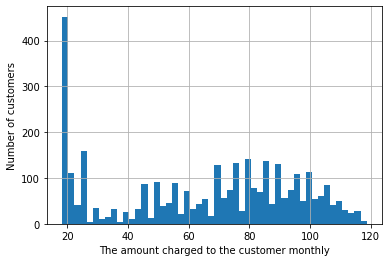

In [13]:
df['MonthlyCharges'].hist(bins=50)
plt.xlabel('The amount charged to the customer monthly')
plt.ylabel('Number of customers')

In the histogram above, we observe that there are few extreme values of `MonthlyCharges`. The use of 50 bins allows to depict the distribution clearly. We will see there is one outlier when X axial is 20. We will deal with it in next part.

Text(0, 0.5, 'Number of customers')

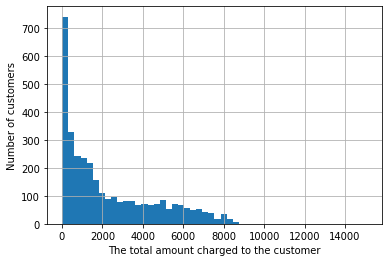

In [14]:
df['TotalCharges'].hist(bins=50, label =  'Histogram')
plt.xlabel('The total amount charged to the customer')
plt.ylabel('Number of customers')

In the histogram above, we observe that there are few extreme values of `TotalCharges`. The use of 50 bins allows to depict the distribution clearly. We will see there is one outlier when X axial is 0. We will deal with it in next part.

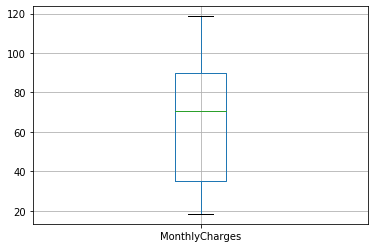

In [15]:
# Next, we look at boxplots to understand the distribution better.
df.boxplot(column = 'MonthlyCharges')

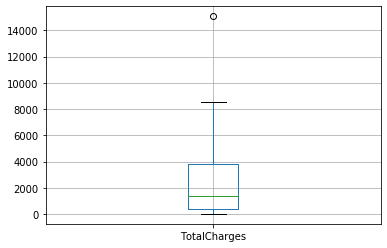

In [16]:
# Next, we look at boxplots to understand the distribution better.
df.boxplot(column = 'TotalCharges')

The boxplot above confirms the existence of outliers or extremes.Let's isolate them through `Churn`.

Text(0.5, 0.98, '')

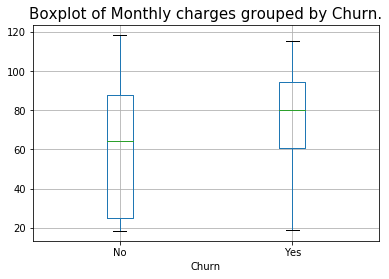

In [17]:
# Boxplots of ApplicantIncome, grouped by the categorical attribute SeniorCitizen
df.boxplot(column = 'MonthlyCharges',by = 'Churn')
plt.title('Boxplot of Monthly charges grouped by Churn.',fontsize=15)
plt.suptitle("")# get rid of the automatic 'Boxplot grouped by group_by_column_name' title

As we can see, the cost of "Yes" was significantly higher, perhaps because these groups did not achieve the desired results.

Finally, let's examine the relationship between `ApplicantIncome` and `LoanAmount` with a scatter plot.

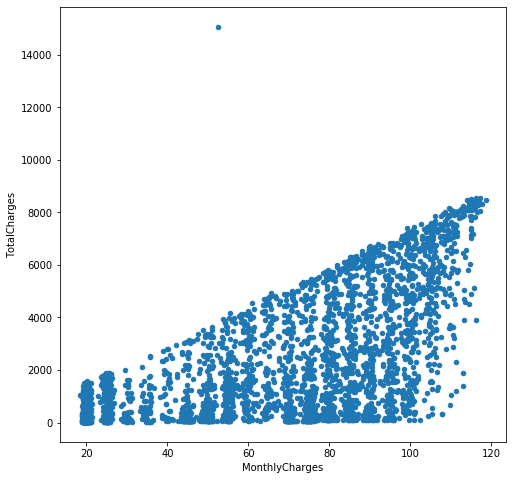

In [18]:
df.plot.scatter(x='MonthlyCharges', y='TotalCharges',figsize=(8,8))

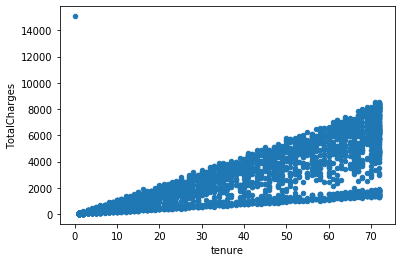

In [19]:
df.plot.scatter(x='tenure', y='TotalCharges')

Based on this scatter plot we can say that `TotalCharges` probably tends to grow linearly as `MonthlyCharges` and `Tenure` grows. But there is an obvious outlier and we need to deal with it in the next section. 

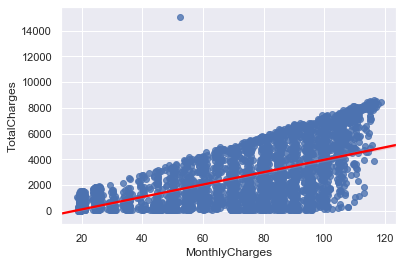

In [20]:
sns.set(color_codes=True)
sns.regplot(x='MonthlyCharges', y='TotalCharges',data=df, line_kws={"color": "red"})
plt.show()

This Regplot suggests that typically `MonthlyCharges` is 40 times lower than `TotalCharges`.

### Boxplots, Violinplots, Stripplots and Swarmplots

Next, we will use the `Seaborn` module to demonstrate a few variations or alternatives to boxplots.

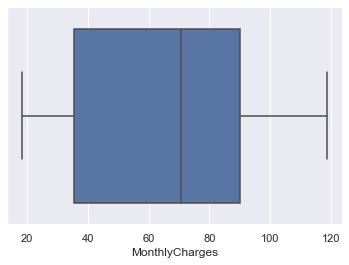

In [21]:
#First, let's draw a seaborn-style boxplot for MonthlyCharges
sns.boxplot(x=df['MonthlyCharges'])
sns.set(rc={'figure.figsize':(10,8)}) 

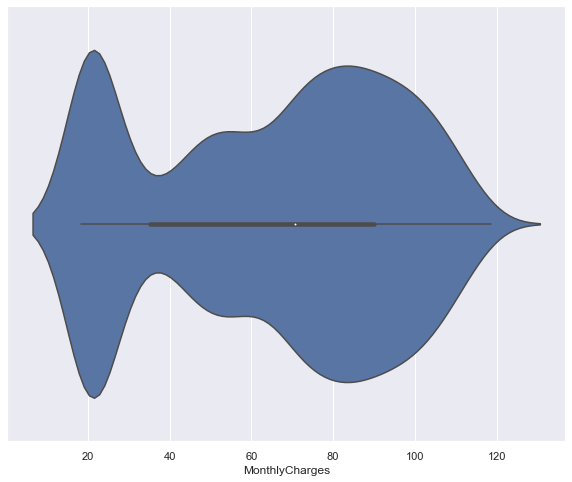

In [22]:
#Violinplot for MonthlyCharges
sns.violinplot(x=df['MonthlyCharges'])
sns.set(rc={'figure.figsize':(10,8)}) 

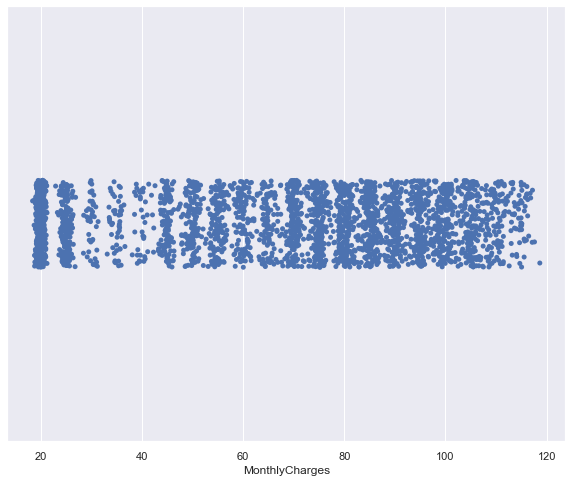

In [23]:
#Stripplot for MonthlyCharges
sns.stripplot(x=df['MonthlyCharges'], jitter=True)

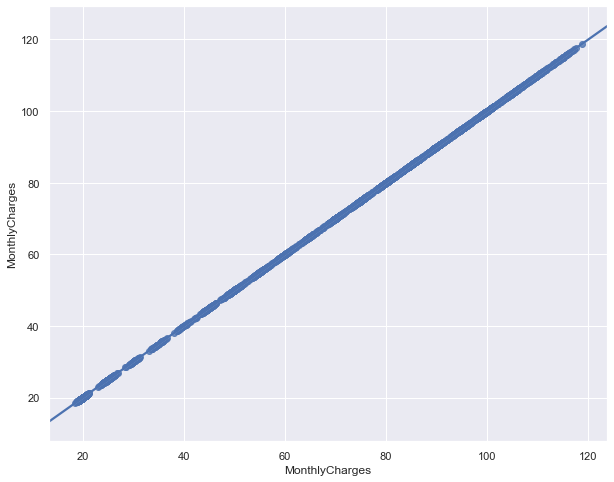

In [24]:
#Regplot for MonthlyCharges
sns.regplot(x="MonthlyCharges",y="MonthlyCharges",data=df)

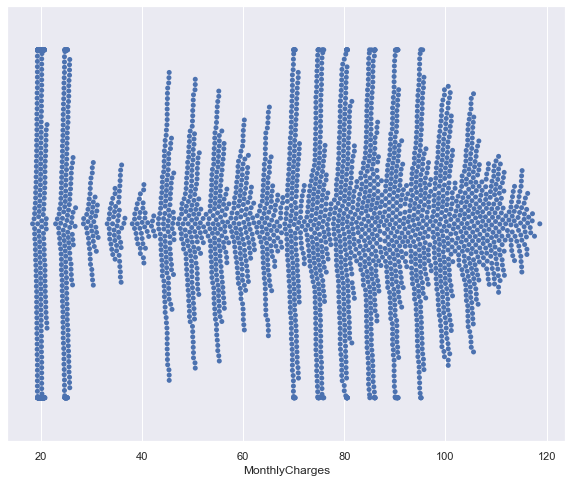

In [25]:
#Swarmplot for MonthlyCharges
sns.swarmplot(x=df['MonthlyCharges'])

#### Distribution Analysis for Categorical Attributes

As noted above `Churn` is rather a categorical attribute with two categories/values:
- Yes - the customers have already churned
- No - the customers didn't churn

Let's look at the chances of getting a loan based on credit history. That is, let's examine the relation between atributes `Churn` and `PhoneService`.

First, let's take a look at the frequency table for attribute `Churn`:

In [26]:
frequency_table = df['Churn'].value_counts(ascending=True)
print('Frequency Table for Customer’s internet service provider (Yes, No)') 
print(frequency_table)

Frequency Table for Customer’s internet service provider (Yes, No)
Yes     871
No     2464
Name: Churn, dtype: int64


Next, build an Excel-style pivot table for `PhoneService` and `Churn` with the pivot_table method:

In [27]:
pivot_table = df.pivot_table(values='PhoneService',
                       index=['Churn'],
                       aggfunc=lambda x: x.map({'Yes':1, 'No':0}).mean()) 

Here the values of `PhoneService` are grouped by the index `Churn`, and the aggfunc is applied to each group. In the example above aggfunc is `mean()`, assuming the Y and N values in column `PhoneService` are replaced by 1s and 0s, respectively.

In [28]:
print(pivot_table)

       PhoneService
Churn              
No         0.905844
Yes        0.913892


Pivottables can be inserted as follows.The probability of `PhoneService` without "churn" is about 91%, while the probability of `PhoneService` with "churn" is about 91%.

Let's plot the probability of `Churn`.

Text(0.5, 1.0, 'The Churn in the Customer')

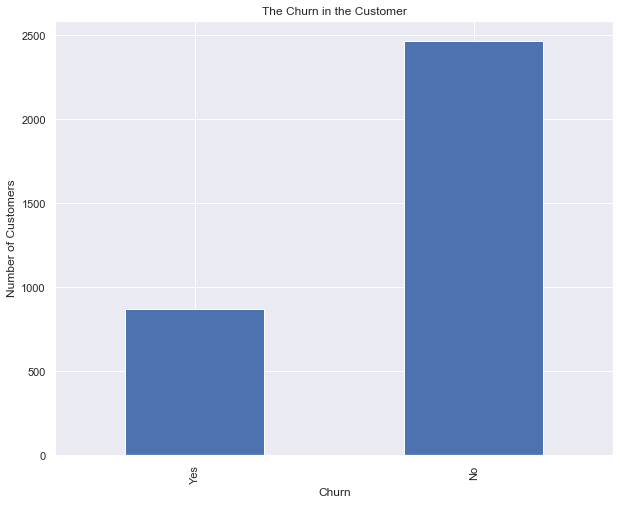

In [29]:
# Plot the frequency table for Credit_History
frequency_table.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('The Churn in the Customer')

"Not Churned" has almost as three times as "Churned".

Alternately, the two plots above can be combined in a stacked chart by plotting the output of with Pandas' `crosstab()` function:

Text(0, 0.5, 'Number of Customers')

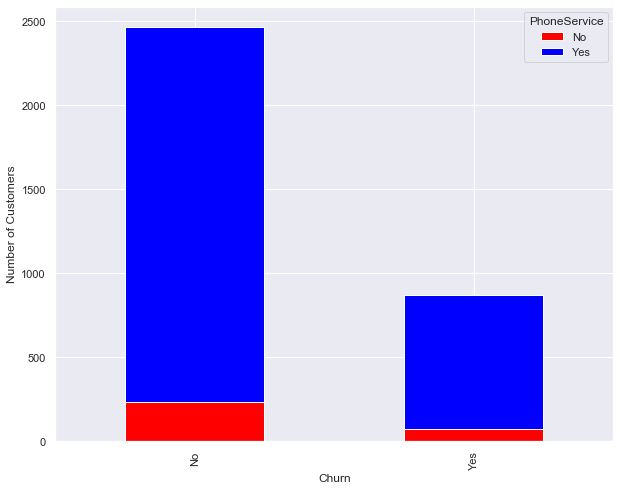

In [30]:
stacked_chart = pd.crosstab(df['Churn'], df['PhoneService'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Customers')

Furthermore, we can stackchart `Churn` and `Gender` against `PhoneService`.

Text(0, 0.5, 'Number of Customers')

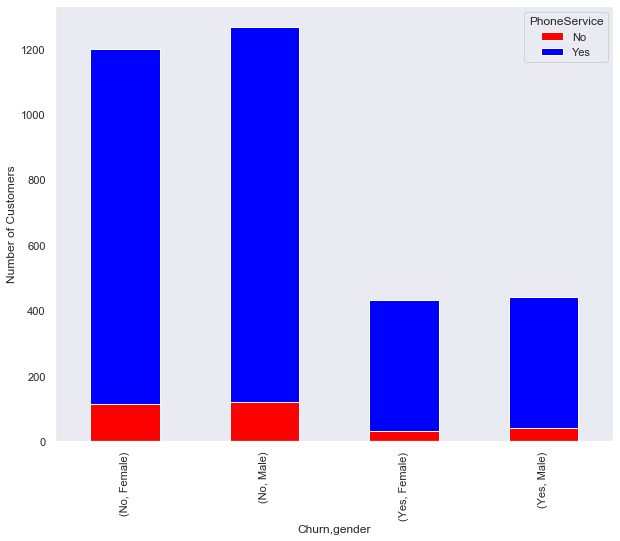

In [31]:
stacked_chart_gender = pd.crosstab([df['Churn'], df['gender']], df['PhoneService'])
stacked_chart_gender.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Customers')

## C. Data Preparation. 

### a. Fill in missing values. 

#### Check for missing values

It is often useful to impute missing values as many ML algorithms do not work with missing data and even if they do, imputing these values often helps to build a more accurate predictive model.

In [32]:
# Find the number of nulls/NaNs in the dataset.

df.apply(lambda x: sum(x.isnull()), axis=0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               0
dtype: int64

We can get the 5 missing value in `TotalCharges`.

#### Impute/fill missing values in column TotalCharges.

There are numerous ways to fill the missing values in column `TotalCharges` – the simplest being replacement by mean, which can be done with the following code:

```pyton
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
```

At the other extreme, we could build an ML model to predict `TotalCharges` on the basis of other columns and then use the model to predict the missing values.

We may hypothesise that attributes `PhoneService` and `InternetService` combined can give a good estimate of `TotalCharges`.

First, let’s look at the boxplot to see if a trend exists:

Text(0.5, 0.98, '')

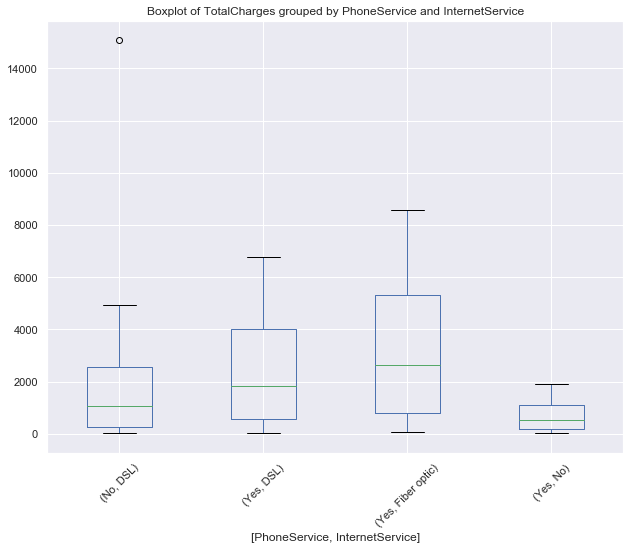

In [33]:
df.boxplot(column='TotalCharges', by=['PhoneService','InternetService'], rot=45)

plt.title("Boxplot of TotalCharges grouped by PhoneService and InternetService")

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

We can use the median of `TotalCharges` for imputing the missing values in each group. But first, we have to ensure that `PhoneService` and `InternetService` do not have missing values.

In [34]:
df['PhoneService'].value_counts()

Yes    3028
No      307
Name: PhoneService, dtype: int64

In [35]:
df['InternetService'].value_counts()

Fiber optic    1470
DSL            1133
No              732
Name: InternetService, dtype: int64

We can see that there is no missing value in "PhoneService" and "InternetService".

Next, we create a pivot table, which contains the median values for all four groups.

In [36]:
table = df.pivot_table(values='TotalCharges', 
                       index='PhoneService', 
                       columns='InternetService', 
                       aggfunc=np.median)
print(table)

InternetService       DSL  Fiber optic     No
PhoneService                                 
No               1048.875          NaN    NaN
Yes              1834.150     2650.125  538.2


Finally, we define a function that returns the value in the PivotTable and applies it to fill in the missing value in `TotalCharges`.

In [37]:
# Define function to return an element of the pivot table
def get_element(x):
    return table.loc[x['PhoneService'], x['InternetService']]

# Replace missing values
df['TotalCharges'].fillna(df[df['TotalCharges'].isnull()].apply(get_element, axis=1), inplace=True)

In [38]:
# Verify there are no missing values in column LoanAmount

df['TotalCharges'].describe()

count     3335.000000
mean      2273.999813
std       2271.231918
min         18.800000
25%        395.475000
50%       1378.450000
75%       3783.600000
max      15069.500000
Name: TotalCharges, dtype: float64

Now we have already finished the missing value in `TotalCharges`.

### b. Remove or transform outliers. 

In the previous lab exercise, we observed that `TotalCharges` contains some extreme values. Let's take a look at their histograms again.

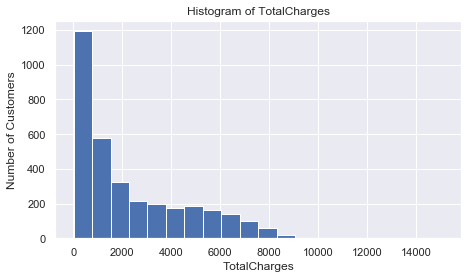

In [39]:
# Create figure with subplot
fig = plt.figure(figsize=(16,4))

# Plot TotalCharges
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of TotalCharges")
ax1.set_xlabel('TotalCharges')
ax1.set_ylabel('Number of Customers')
df['TotalCharges'].hist(bins=20)

Let’s analyse `TotalCharges` first. Since the extreme values are practically possible, i.e. some people might paid for high-value charges, instead of ignoring the data rows with extreme `TotalCharges` values, we can use a log transformation to decrease any negative impact they may have later on when applying a ML algorithm to build a predictive model.

In [40]:
# Use a log transformation to decrease the impact of extreme values in column TotalCharges
df['TotalCharges_log'] = np.log(df['TotalCharges'])

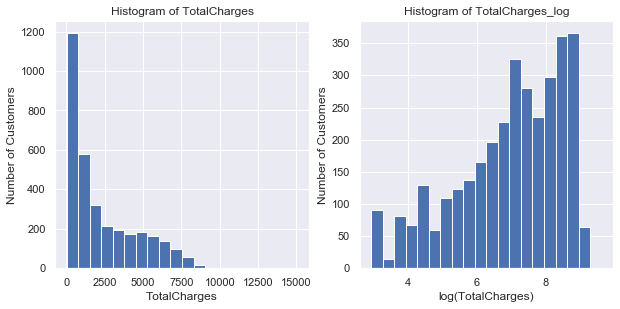

In [41]:
# Create figure with two subplots
fig = plt.figure(figsize=(10,10))

# Plot TotalCharges
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Histogram of TotalCharges")
ax1.set_xlabel('TotalCharges')
ax1.set_ylabel('Number of Customers')
df['TotalCharges'].hist(bins=20)

# Plot TotalCharges_log
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("Histogram of TotalCharges_log")
ax2.set_xlabel('log(TotalCharges)')
ax2.set_ylabel('Number of Customers')
df['TotalCharges_log'].hist(bins=20)

The histograms show that the new features have distribution closer to normal than the original features `TotalCharges`.

## D. Predictive Modelling. (SVM, NB, RF)

`Churn rate` (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support. So we will choose the `Churn` to predict.

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_log
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3.396185
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,7.544068
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4.683519
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7.517928
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,5.021575


Let's first turn our `target` into a numerical classification and then use other data to predict it.

In [43]:
df["Churn01"] = df["Churn"].map({"Yes":1,"No":0})
target = df["Churn01"]

In [44]:
df = df.drop(["Churn","Churn01"], axis=1)
predictors = df.values
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TotalCharges_log
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,3.396185
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,7.544068
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,4.683519
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,7.517928
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,5.021575


Having identified the `target` and removed it from the dataset, we then sorted all non-numeric data into Numbers like 1,2,3 and turned them into Numbers.

Change `gender` to a numeric attribute and delete the original column.

In [45]:
lb_make = LabelEncoder()
df["gender_code"] = lb_make.fit_transform(df["gender"])
df[["gender","gender_code"]].head()

,gender,gender_code
0,Female,0
1,Male,1
2,Male,1
3,Male,1
4,Female,0


In [46]:
df = df.drop(["gender"], axis=1)
predictors = df.values
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TotalCharges_log,gender_code
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,3.396185,0
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,7.544068,1
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,4.683519,1
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,7.517928,1
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,5.021575,0


Now we find that the original column of `gender` has been deleted and replaced by a numeric classification of `gender_code`. We did the same steps for all non-numeric data.

We turn `Partner` into a digital classification.

In [47]:
lb_make = LabelEncoder()
df["Partner_code"] = lb_make.fit_transform(df["Partner"])
df[["Partner","Partner_code"]].head()

,Partner,Partner_code
0,Yes,1
1,No,0
2,No,0
3,No,0
4,No,0


We turn `Dependents` into a digital classification.

In [48]:
lb_make = LabelEncoder()
df["Dependents_code"] = lb_make.fit_transform(df["Dependents"])
df[["Dependents","Dependents_code"]].head()

,Dependents,Dependents_code
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0


We turn `PhoneService` into a digital classification.

In [49]:
lb_make = LabelEncoder()
df["PhoneService_code"] = lb_make.fit_transform(df["PhoneService"])
df[["PhoneService","PhoneService_code"]].head()

,PhoneService,PhoneService_code
0,No,0
1,Yes,1
2,Yes,1
3,No,0
4,Yes,1


We turn `MultipleLines` into a digital classification.

In [50]:
lb_make = LabelEncoder()
df["MultipleLines_code"] = lb_make.fit_transform(df["MultipleLines"])
df[["MultipleLines","MultipleLines_code"]].head()

,MultipleLines,MultipleLines_code
0,No phone service,1
1,No,0
2,No,0
3,No phone service,1
4,No,0


We turn `InternetService` into a digital classification.

In [51]:
lb_make = LabelEncoder()
df["InternetService_code"] = lb_make.fit_transform(df["InternetService"])
df[["InternetService","InternetService_code"]].head()

,InternetService,InternetService_code
0,DSL,0
1,DSL,0
2,DSL,0
3,DSL,0
4,Fiber optic,1


We turn `OnlineSecurity` into a digital classification.

In [52]:
lb_make = LabelEncoder()
df["OnlineSecurity_code"] = lb_make.fit_transform(df["OnlineSecurity"])
df[["OnlineSecurity","OnlineSecurity_code"]].head()

,OnlineSecurity,OnlineSecurity_code
0,No,0
1,Yes,2
2,Yes,2
3,Yes,2
4,No,0


We turn `OnlineBackup` into a digital classification.

In [53]:
lb_make = LabelEncoder()
df["OnlineBackup_code"] = lb_make.fit_transform(df["OnlineBackup"])
df[["OnlineBackup","OnlineBackup_code"]].head()

,OnlineBackup,OnlineBackup_code
0,Yes,2
1,No,0
2,Yes,2
3,No,0
4,No,0


We will delete the original data of `Partner`,`Dependents`,`PhoneService`,`MultipleLines`,`InternetService`,`OnlineSecurity`,`OnlineBackup`.

In [54]:
df = df.drop(["Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup"], axis=1)
predictors = df.values
df.head()

,customerID,SeniorCitizen,tenure,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,...,TotalCharges,TotalCharges_log,gender_code,Partner_code,Dependents_code,PhoneService_code,MultipleLines_code,InternetService_code,OnlineSecurity_code,OnlineBackup_code
0,7590-VHVEG,0,1,No,No,No,No,Month-to-month,Yes,Electronic check,...,29.85,3.396185,0,1,0,0,1,0,0,2
1,5575-GNVDE,0,34,Yes,No,No,No,One year,No,Mailed check,...,1889.50,7.544068,1,0,0,1,0,0,2,0
2,3668-QPYBK,0,2,No,No,No,No,Month-to-month,Yes,Mailed check,...,108.15,4.683519,1,0,0,1,0,0,2,2
3,7795-CFOCW,0,45,Yes,Yes,No,No,One year,No,Bank transfer (automatic),...,1840.75,7.517928,1,0,0,0,1,0,2,0
4,9237-HQITU,0,2,No,No,No,No,Month-to-month,Yes,Electronic check,...,151.65,5.021575,0,0,0,1,0,1,0,0


We turn `DeviceProtection` into a digital classification.

In [55]:
lb_make = LabelEncoder()
df["DeviceProtection_code"] = lb_make.fit_transform(df["DeviceProtection"])
df[["DeviceProtection","DeviceProtection_code"]].head()

,DeviceProtection,DeviceProtection_code
0,No,0
1,Yes,2
2,No,0
3,Yes,2
4,No,0


We turn `TechSupport` into a digital classification.

In [56]:
lb_make = LabelEncoder()
df["TechSupport_code"] = lb_make.fit_transform(df["TechSupport"])
df[["TechSupport","TechSupport_code"]].head()

,TechSupport,TechSupport_code
0,No,0
1,No,0
2,No,0
3,Yes,2
4,No,0


We turn `StreamingTV` into a digital classification.

In [57]:
lb_make = LabelEncoder()
df["StreamingTV_code"] = lb_make.fit_transform(df["StreamingTV"])
df[["StreamingTV","StreamingTV_code"]].head()

,StreamingTV,StreamingTV_code
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0


We turn `StreamingMovies` into a digital classification.

In [58]:
lb_make = LabelEncoder()
df["StreamingMovies_code"] = lb_make.fit_transform(df["StreamingMovies"])
df[["StreamingMovies","StreamingMovies_code"]].head()

,StreamingMovies,StreamingMovies_code
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0


We turn `Contract` into a digital classification.

In [59]:
lb_make = LabelEncoder()
df["Contract_code"] = lb_make.fit_transform(df["Contract"])
df[["Contract","Contract_code"]].head()

,Contract,Contract_code
0,Month-to-month,0
1,One year,1
2,Month-to-month,0
3,One year,1
4,Month-to-month,0


We turn `PaperlessBilling` into a digital classification.

In [60]:
lb_make = LabelEncoder()
df["PaperlessBilling_code"] = lb_make.fit_transform(df["PaperlessBilling"])
df[["PaperlessBilling","PaperlessBilling_code"]].head()

,PaperlessBilling,PaperlessBilling_code
0,Yes,1
1,No,0
2,Yes,1
3,No,0
4,Yes,1


We turn `PaymentMethod` into a digital classification.

In [61]:
lb_make = LabelEncoder()
df["PaymentMethod_code"] = lb_make.fit_transform(df["PaymentMethod"])
df[["PaymentMethod","PaymentMethod_code"]].head()

,PaymentMethod,PaymentMethod_code
0,Electronic check,2
1,Mailed check,3
2,Mailed check,3
3,Bank transfer (automatic),0
4,Electronic check,2


We will delete the original data of `DeviceProtection`,`TechSupport`,`StreamingTV`,`StreamingMovies`,`Contract`,`PaperlessBilling`,`PaymentMethod`.

By the way because the `customerID` is the non-numeric data and we won't use it, so we delete it.

In [62]:
df = df.drop(["DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","customerID"], axis=1)
predictors = df.values
new = df.head()
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalCharges_log,gender_code,Partner_code,Dependents_code,PhoneService_code,MultipleLines_code,InternetService_code,OnlineSecurity_code,OnlineBackup_code,DeviceProtection_code,TechSupport_code,StreamingTV_code,StreamingMovies_code,Contract_code,PaperlessBilling_code,PaymentMethod_code
0,0,1,29.85,29.85,3.396185,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,56.95,1889.50,7.544068,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,53.85,108.15,4.683519,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,45,42.30,1840.75,7.517928,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,70.70,151.65,5.021575,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


We save the new dataset as "new" to use it more time for predicting.

Now we have already prepared the dataset.

Split the data set into a training (80%) and test (20%) data sets.

In [63]:
# pepare independent stratified data sets for training and test of the final model
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, shuffle=True, stratify=target)

Scale all predictor values to the range [0, 1]. Note the target attribute is already binary.

Note that the MinMaxScaler is applied separately to the training and the testing datasets. 
This is to ensure that this transformation when performed on teh testing dataset is not influnced by the training dataset.
We choose the training(80%) and test(20%) after we tested. It's the best allocation.

In [64]:
min_max_scaler = preprocessing.MinMaxScaler()
predictors_train = min_max_scaler.fit_transform(predictors_train)
predictors_test = min_max_scaler.fit_transform(predictors_test)

#### Features Selection

#### Apply RFE with SVM for selecting the best features

In [65]:
# create a base classifier used to evaluate a subset of attributes
estimatorSVM = svm.SVR(kernel="linear")
selectorSVM = RFE(estimatorSVM, 3)
selectorSVM = selectorSVM.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorSVM.support_)
print(selectorSVM.ranking_)

[False False  True  True  True False False False False False False False
 False False False False False False False False]
[ 9  2  1  1  1 15 13 12  5 10  7  4  6  8  3 17 18 16 11 14]


#### Apply RFE with Logistic Regression for selecting the best features

In [66]:
# create a base classifier used to evaluate a subset of attributes
estimatorLR = LogisticRegression()
# create the RFE model and select 3 attributes
selectorLR = RFE(estimatorLR, 3)
selectorLR = selectorLR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorLR.support_)
print(selectorLR.ranking_)

[False False  True False  True False False False False False False False
 False False False False False  True False False]
[16  4  1  5  1 18 12  8  3 13  7  6  9 11  2 17 15  1 10 14]


#### Apply RFE with Random Forest for selecting the best features

In [67]:
# create a base classifier used to evaluate a subset of attributes
estimatorRF = RandomForestClassifier()
# create the RFE model and select 3 attributes
selectorRF = RFE(estimatorRF, 3)
selectorRF = selectorRF.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorRF.support_)
print(selectorRF.ranking_)

[False False  True  True  True False False False False False False False
 False False False False False False False False]
[13  2  1  1  1  8 10 16 18  9  7  6 11 15  4 17 14  3 12  5]


#### Evaluate on the Test Data Set

Apply the selectors to prepare training data sets only with the selected features

#### SVM

In [68]:
predictors_train_SVMselected = selectorSVM.transform(predictors_train)
predictors_test_SVMselected = selectorSVM.transform(predictors_test)

#### Logistic Regression

In [69]:
predictors_train_LRselected = selectorLR.transform(predictors_train)
predictors_test_LRselected = selectorLR.transform(predictors_test)

#### Random Forest

In [70]:
predictors_train_RFselected = selectorRF.transform(predictors_train)
predictors_test_RFselected = selectorRF.transform(predictors_test)

### Train and evaluate SVM classifiers with both the selected features and all features 

Here we train three models:
* model1 - with the features selected by SVM
* model2 - with the features selected by Logistic Regression
* model3 - with the features selected by Random Forest
* model4 - with all features (i.e. without feature selection)

In [71]:
classifier = svm.SVC()

In [72]:
model1 = classifier.fit(predictors_train_SVMselected, target_train)
model1.score(predictors_test_SVMselected, target_test)

0.7856071964017991

In [73]:
model2 = classifier.fit(predictors_train_LRselected, target_train)
model2.score(predictors_test_LRselected, target_test)

0.7871064467766117

In [74]:
model3 = classifier.fit(predictors_train, target_train)
model3.score(predictors_test, target_test)

0.8215892053973014

In [75]:
model4 = classifier.fit(predictors_train, target_train)
model4.score(predictors_test, target_test)

0.8215892053973014

#### Conclusion

The results above, give evidence that model1 is most accurate. And Random Forest doesn't need to test the rate of accurate by code.

However, when you execute this code again, it is very likely to get different results.

In order to get more accurate results, Model1 is still the best model after the variance of many experiments.

#### Import evaluation and plotting functions

In [76]:
%run ./Lab4_Functions-5.ipynb

#### Prepare an array of 100 equally spaced false-positive-rate values between 0 and 1
To be used as an x-axis in ROC curve plots.

In [77]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

#### Train a Probablistic SVM Classifier

In [78]:
# Create an SVM classifier object as a probabilistic classifier with default parameters
SVM_classifier = svm.SVC(probability=True, gamma="scale")

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_SVM, f1_scores_SVM, tprs_SVM, aucs_SVM = evaluate_classifier(folds=10, 
                                                                        p=predictors, t=target, 
                                                                        classifier=SVM_classifier, 
                                                                        mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

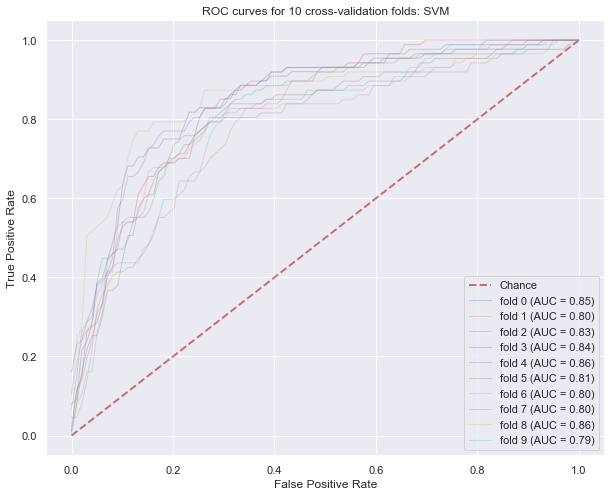

In [79]:
# Plot an ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

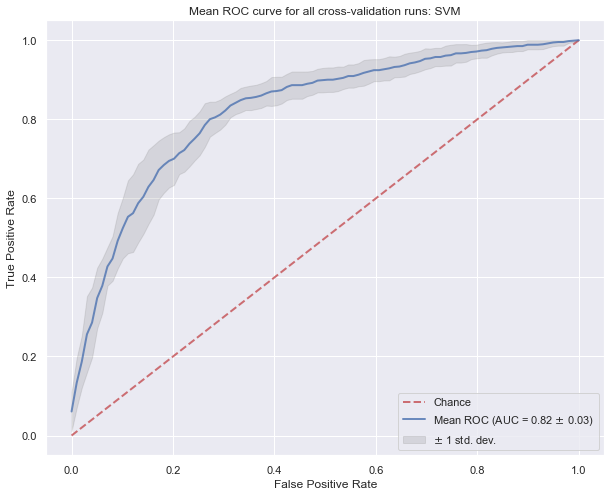

In [80]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

#### Train a Naive Bayes Classifier

In [81]:
# Create a Naive Bayes classifier object with default parameters (note: Naive Bayes is a probabilistic classifier by default)
NB_classifier = GaussianNB()

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_NB, f1_scores_NB, tprs_NB, aucs_NB = evaluate_classifier(folds=10, 
                                                                    p=predictors, t=target, 
                                                                    classifier=NB_classifier, 
                                                                    mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

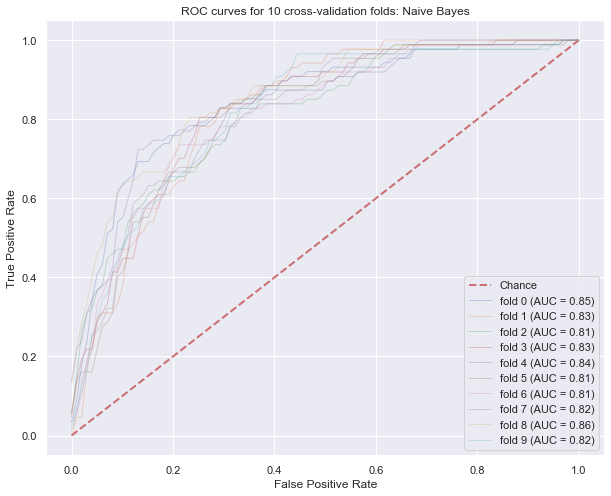

In [82]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

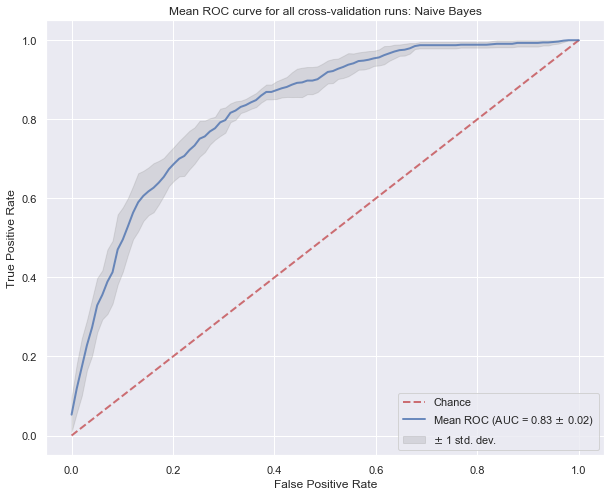

In [83]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

#### Train a Random Forest Classifier

In [84]:
# Create a Random Forest classifier object with default parameters (note: Random Forest is a probabilistic classifier by default)
RF_classifier = RandomForestClassifier()

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_RF, f1_scores_RF, tprs_RF, aucs_RF = evaluate_classifier(folds=10, 
                                                                    p=predictors, t=target, 
                                                                    classifier=RF_classifier, 
                                                                    mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

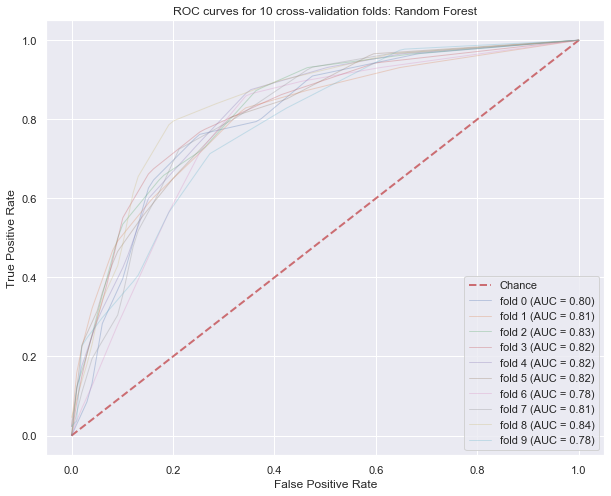

In [85]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_RF, aucs_RF, 'Random Forest')

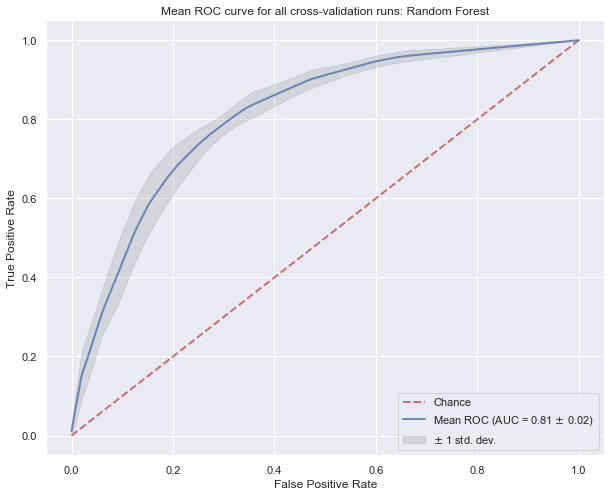

In [86]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_RF, aucs_RF, 'Random Forest')

#### Compare All Trained Classifiers

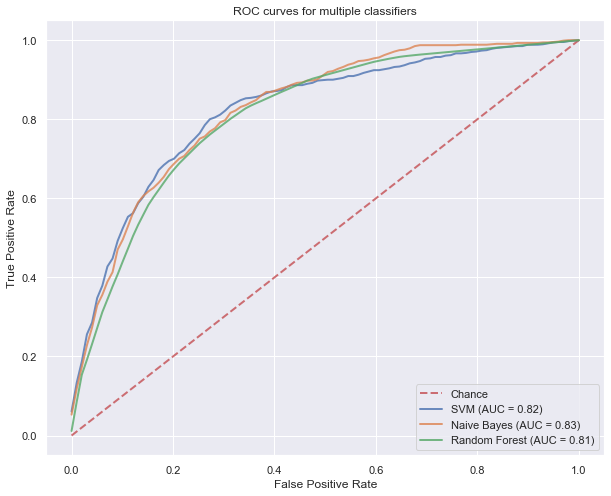

In [87]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_NB, axis=0), np.mean(tprs_RF, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_NB), np.mean(aucs_RF)]), 
                              np.array(['SVM', 'Naive Bayes', 'Random Forest']))

In [88]:
# Compare the statistics of the accuracies across all cross-validation folds
accuracies_df = pd.DataFrame(data={'SVM' : accuracies_SVM, 'Naive Bayes' : accuracies_NB, 'Random Forest' : accuracies_RF})

In [89]:
accuracies_df.describe()

,SVM,Naive Bayes,Random Forest
count,10.000000,10.000000,10.000000
mean,0.796106,0.764017,0.780803
std,0.022354,0.018822,0.018046
min,0.754491,0.742515,0.744745
25%,0.791013,0.748685,0.772523
50%,0.797297,0.760119,0.780781
75%,0.808064,0.776276,0.792955
max,0.834835,0.798799,0.805389


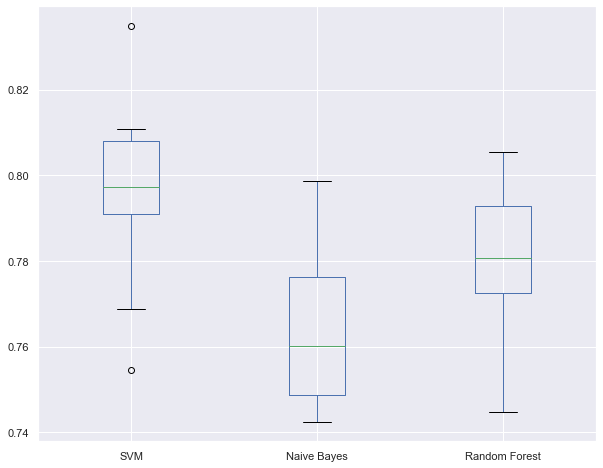

In [90]:
accuracies_df.boxplot()

In [91]:
# Compare the statistics of the F1-scores across all cross-validation folds
f1_scores_df = pd.DataFrame(data={'SVM' : f1_scores_SVM, 'Naive Bayes' : f1_scores_NB, 'Random Forest' : f1_scores_RF})

In [92]:
f1_scores_df.describe()

,SVM,Naive Bayes,Random Forest
count,10.000000,10.000000,10.000000
mean,0.540551,0.610511,0.503379
std,0.050616,0.030914,0.055142
min,0.453901,0.570000,0.406250
25%,0.508907,0.584950,0.465258
50%,0.543632,0.609143,0.508412
75%,0.566364,0.623737,0.540969
max,0.630872,0.663317,0.585987


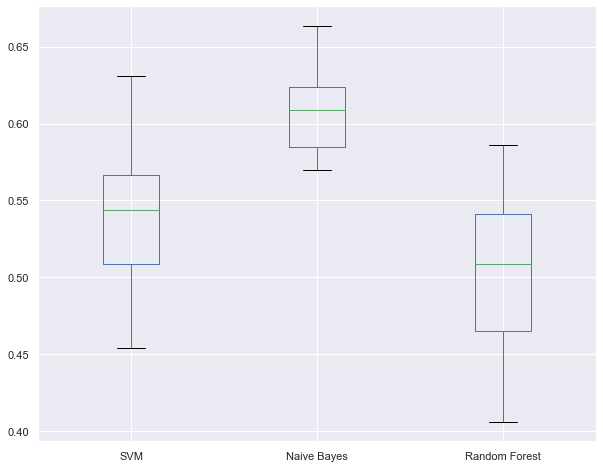

In [93]:
f1_scores_df.boxplot()

#### Conclusion

The accuracy of the SVM classifier slightly tall, average accuracy is 80%.Although there are fluctuations but the accuracy of the SVM classifier was slightly higher than the other two kinds of classifier.The ROC curve further proved the superiority of the SVM, the AUC is significantly higher than the SVM.Precision box figure show that support vector machine (SVM) also has a lower variance, this is desirable.

## Random Forest

### The objective is to predict percentage rate at which customers stop subscribing to a service. either 0 for stop subscribing or 1 for continue subscribing. We'll limit the data to 100,000 individuals to speed up training.

### The problem is imbalanced (far more of one label than another) so for assessing performance, we'll use recall, precision, receiver operating characteristic area under the curve (ROC AUC), and also plot the ROC curve. Accuracy is not a useful metric when dealing with an imbalanced problem.

In [94]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

import itertools

In [95]:
newdf = pd.read_csv('./telco_customer_churn_19_09_2019.csv')
newdf['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

We'll read the data in and do a little cleaning.

In [96]:
newdf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
newdf.sample(2000, random_state = RSEED)
newdf["Churn"] = newdf["Churn"].map({"Yes":1,"No":0})
newdf["gender"] = newdf["gender"].map({"Female":1,"Male":0})
newdf["Partner"] = newdf["Partner"].map({"Yes":1,"No":0})
newdf["Dependents"] = newdf["Dependents"].map({"Yes":1,"No":0})
newdf["PhoneService"] = newdf["PhoneService"].map({"Yes":1,"No":0})
newdf["OnlineSecurity"] = newdf["OnlineSecurity"].map({"Yes":1,"No":0})
newdf["OnlineBackup"] = newdf["OnlineBackup"].map({"Yes":1,"No":0})
newdf["DeviceProtection"] = newdf["DeviceProtection"].map({"Yes":1,"No":0})
newdf["TechSupport"] = newdf["TechSupport"].map({"Yes":1,"No":0})
newdf["StreamingTV"] = newdf["StreamingTV"].map({"Yes":1,"No":0})
newdf["StreamingMovies"] = newdf["StreamingMovies"].map({"Yes":1,"No":0})
newdf["PaperlessBilling"] = newdf["PaperlessBilling"].map({"Yes":1,"No":0})
newdf["MultipleLines"] = newdf["MultipleLines"].map({"No phone service":0,"No":1,"Yes":2})
newdf["InternetService"] = newdf["InternetService"].map({"DSL":0,"Fiber optic":1,"No":2})
newdf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,1,0,1.0,...,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,1,0,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,0,1.0,...,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,1,1,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1


In [98]:
newdf = newdf.select_dtypes('number')

In [99]:
newdf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1,29.85,29.85,0
1,0,0,0,0,34,1,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0,56.95,1889.50,0
2,0,0,0,0,2,1,1,0,1.0,1.0,0.0,0.0,0.0,0.0,1,53.85,108.15,1
3,0,0,0,0,45,0,0,0,1.0,0.0,1.0,1.0,0.0,0.0,0,42.30,1840.75,0
4,1,0,0,0,2,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1,70.70,151.65,1


#### Label Distribution

In [100]:
newdf.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [101]:
newdf = newdf.rename(columns = {'Churn': 'label'})
newdf['label'].value_counts()

0    2464
1     871
Name: label, dtype: int64

The label imbalanced means that accuracy is not the best metric.

#### Split Data into Training and Testing Set

To assess our predictions, we'll need to use a training and a testing set. The model learns from the training data and then makes predictions on the testing data. 

We'll save 30% of the examples for testing.

In [102]:
# Extract the labels
labels = np.array(newdf.pop('label'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(newdf, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)

In [103]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

# Features for feature importances
features = list(train.columns)

In [104]:
train.shape

(2334, 17)

In [105]:
test.shape

(1001, 17)

#### Decision Tree on Real Data

First, we'll train the decision tree on the data. Let's leave the depth unlimited and see if we get overfitting!

In [106]:
# Train tree
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(train, train_labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 877 nodes with maximum depth 21.


#### Assess Decision Tree Performance

Given the number of nodes in our decision tree and the maximum depth, we expect it has overfit to the training data. This means it will do much better on the training data than on the testing data.

In [107]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)

In [108]:
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 0.999999524552128
Test ROC AUC  Score: 0.6679688308998654


In [109]:
print(f'Baseline ROC AUC: {roc_auc_score(test_labels, [1 for _ in range(len(test_labels))])}')

Baseline ROC AUC: 0.5


Our model does outperform a baseline guess, but we can see it has severely overfit to the training data, acheiving perfect ROC AUC.

#### Evaluate the Decision Tree

We'll write a short function that calculates a number of metrics for the baseline (guessing the most common label in the training data), the testing predictions, and the training predictions. The function also plots the ROC curve where a better model is to the left and towards the top.

In [110]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [111]:
print(Counter(probs))
print(Counter(predictions))

Counter({0.0: 728, 1.0: 273})
Counter({0: 728, 1: 273})


Recall Baseline: 1.0 Test: 0.52 Train: 1.0
Precision Baseline: 0.26 Test: 0.5 Train: 1.0
Roc Baseline: 0.5 Test: 0.67 Train: 1.0


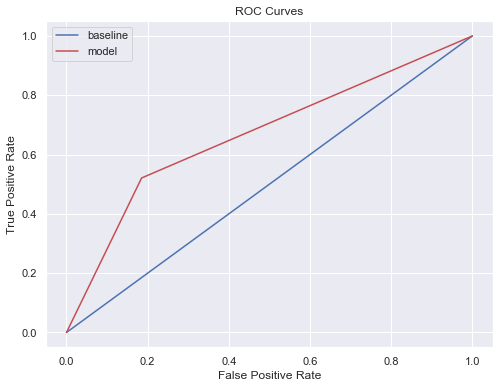

In [112]:
evaluate_model(predictions, probs, train_predictions, train_probs)


There we can see the problem with a single decision tree where the maximum depth is not limited: severe overfitting to the training data.

Another method to inspect the performance of a classification model is by making a confusion matrix.

### Confusion Matrix

In [113]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[603 137]
 [125 136]]


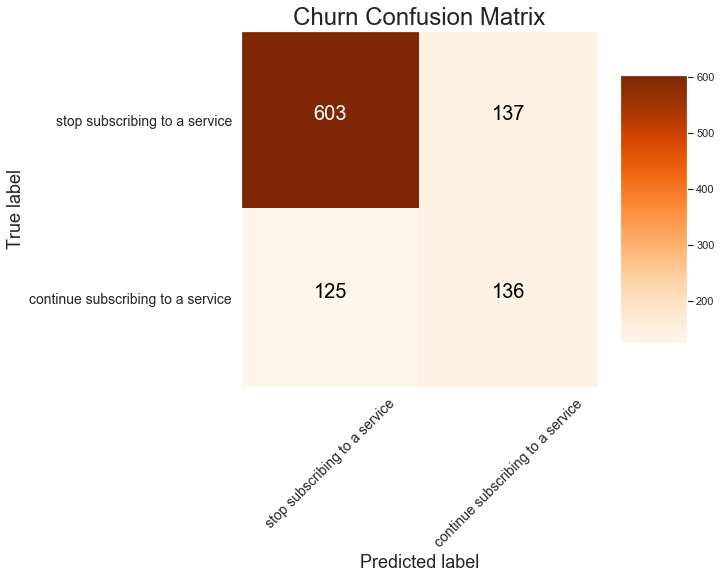

In [114]:
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes = ['stop subscribing to a service', 'continue subscribing to a service'],
                      title = 'Churn Confusion Matrix')

#### Feature Importances

Finally, we can take a look at the features considered most important by the Decision Tree. The values are computed by summing the reduction in Gini Impurity over all of the nodes of the tree in which the feature is used.

In [115]:
fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
15,MonthlyCharges,0.209416
16,TotalCharges,0.189542
4,tenure,0.171878
11,TechSupport,0.149541
7,InternetService,0.039834


### Random Forest

Now we can move on to a more powerful model, the random forest. This takes the idea of a single decision tree, and creates an ensemble model out of hundreds or thousands of trees to reduce the variance. Each tree is trained on a random set of the observations, and for each split of a node, only a subset of the features are used for making a split. When making predictions, the random forest averages the predictions for each of the individual decision trees for each data point in order to arrive at a final classification.

Create the model with 100 trees

In [116]:
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [117]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 864
Average maximum depth 18


We see that each decision tree in the forest has many nodes and is extremely deep. However, even though each individual decision tree may overfit to a particular subset of the training data, the idea is that the overall random forest should have a reduced variance. 

#### Random Forest Results

In [118]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Recall Baseline: 1.0 Test: 0.54 Train: 1.0
Precision Baseline: 0.26 Test: 0.61 Train: 1.0
Roc Baseline: 0.5 Test: 0.81 Train: 1.0


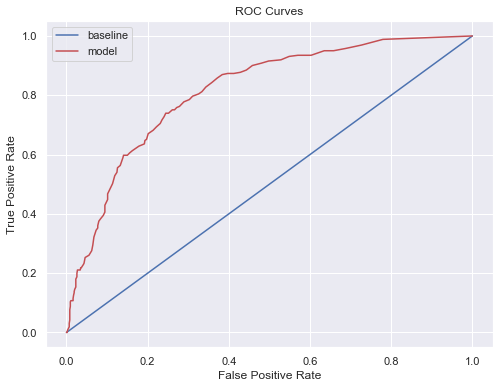

In [119]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Confusion matrix, without normalization
[[603 137]
 [125 136]]


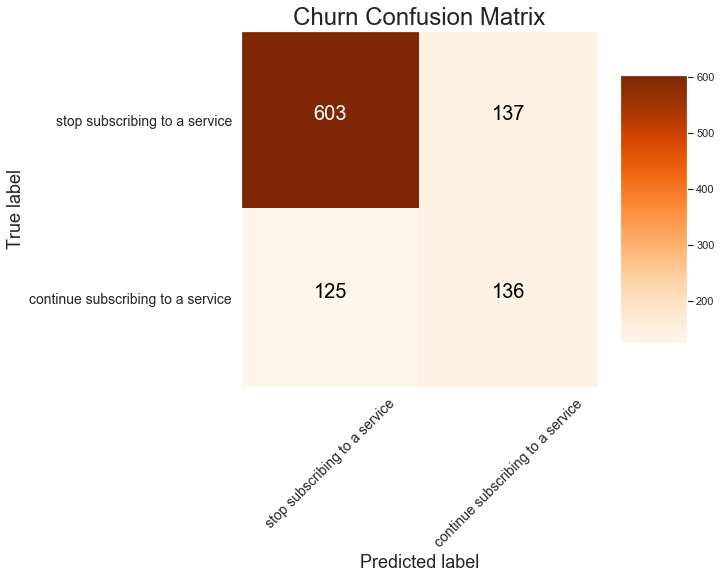

In [120]:
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes = ['stop subscribing to a service', 'continue subscribing to a service'],
                      title = 'Churn Confusion Matrix')

In [121]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
16,TotalCharges,0.201317
15,MonthlyCharges,0.188069
4,tenure,0.176707
11,TechSupport,0.070877
8,OnlineSecurity,0.058979
7,InternetService,0.039363
9,OnlineBackup,0.033837
0,gender,0.030120
14,PaperlessBilling,0.027905
6,MultipleLines,0.027217


### Random Forest Optimization through Random Search

Random Forest Optimization through Random Search
In order to maximize the performance of the random forest, we can perform a random search for better hyperparameters. This will randomly select combinations of hyperparameters from a grid, evaluate them using cross validation on the training data, and return the values that perform the best.


In order to maximize the performance of the random forest, we can perform a random search for better hyperparameters. This will randomly select combinations of hyperparameters from a grid, evaluate them using cross validation on the training data, and return the values that perform the best.

In [122]:
# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(train, train_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.6s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [123]:
rs.best_params_

{'n_estimators': 29,
 'min_samples_split': 5,
 'max_leaf_nodes': 43,
 'max_features': 'auto',
 'max_depth': 16,
 'bootstrap': True}

We can see that the best hyperparameter values are not the defaults. This shows the importance of tuning a model for a specific dataset. Each dataset will have different characteristics, and the model that does best on one dataset will not necessarily do the best across all datasets.

#### Use Best Model

Now we can take the best model (it has already been trained) and evaluate it. Hopefully it does better than the stock Random Forest.

In [124]:
best_model = rs.best_estimator_

In [125]:
train_rf_predictions = best_model.predict(train)
train_rf_probs = best_model.predict_proba(train)[:, 1]

rf_predictions = best_model.predict(test)
rf_probs = best_model.predict_proba(test)[:, 1]

In [126]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 85
Average maximum depth 10


The best maximum depth is not unlimited as we see above! This indicates that restricting the maximum depth of the individual decision trees can improve the cross validation performance of the random forest.

Recall Baseline: 1.0 Test: 0.51 Train: 0.59
Precision Baseline: 0.26 Test: 0.63 Train: 0.78
Roc Baseline: 0.5 Test: 0.82 Train: 0.91


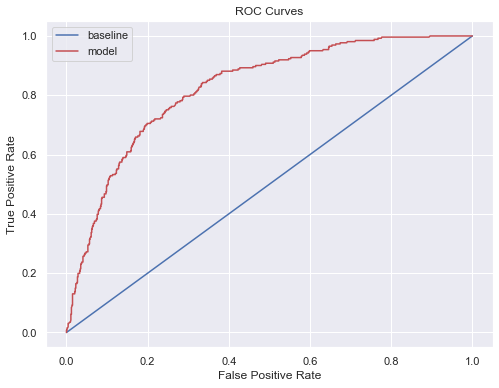

In [127]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

random forest, trains each tree on a different set of the training observations, and make splits at each node based on a subset of the features leading to a model with reduced variance and better generalization performance on the testing set.

## E. Conclusion.

### Final Model

After our previous comparison, SVM achieved good accuracy in all aspects, so we used SVM to make the final prediction of the whole project.

In [128]:
# scale all predictor values to the range [0, 1]
# note the target attribute 'type' is already binary
        
predictors = min_max_scaler.fit_transform(predictors)
model = SVM_classifier.fit(predictors, target)

Use the model to predict the type of three new data:

In [129]:
new_tel = np.array([[0.5,0.4,0.5,0.6,0.5,0.5,0.2,0.3,0.0,1.0,0.0,1.0,0.5,0.5,0.2,0.2,0.2,0.2,1.0,0.2],[0.5,0.8,0.6,0.9,0.4,0.6,0.2,0.8,0.6,0.7,0.2,0.1,0.5,0.6,0.8,0.1,0.2,0.6,0.7,0.4],[0.6,0.5,0.5,0.1,0.6,0.8,0.9,0.5,0.1,0.2,0.3,0.2,0.6,0.7,0.5,0.8,0.9,0.4,0.6,0.2]])

In [130]:
# Probabilistic prediction
np.round(model.predict_proba(new_tel), 2)
# Note: 
#   - the first column are the probabilities for the 20 new tel to belong to class 0
#   - the second column are the probabilities for the 20 new tel to belong to class 1

array([[0.84, 0.16],
       [0.94, 0.06],
       [0.88, 0.12]])

In [131]:
# Exact prediction
model.predict(new_tel)

array([0, 0, 0], dtype=int64)

The previous `Feature Selection`, `Classifiers Selection` and data analysis showed that SVM was the best Classifier to predict.Because we are the chosen target prediction attributes are `"Churn"`, it is for a company analysis whether their customers will in their consumption of important attributes.Therefore, it is very important to choose a classifier with high accuracy, which is why we should analyze each method from multiple aspects.

After the SVM method of prediction, the company's `"Churn Rate"` is zero, it does not mean the loss of customers of the company is not, but to a certain extent on the work of the company.This is why we choose `"Churn"` attribute.Forecast `"Churn"`, can let the company leaders probably understand the company's overall work, side reflects the company's work is needed to improve.